In [1]:
import pandas as pd
import numpy as np

# Load original datasets
d1 = pd.read_csv("dataset1.csv")
d2 = pd.read_csv("dataset2.csv")

# Preview first few rows
d1.head(), d2.head()


(         start_time  bat_landing_to_food habit  rat_period_start  \
 0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
 1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
 2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
 3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
 4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   
 
      rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
 0  30/12/2017 18:38                        108     1       0      0   
 1  30/12/2017 19:55                         17     0       1      0   
 2  30/12/2017 19:55                         41     0       1      0   
 3  30/12/2017 19:55                        111     1       0      0   
 4  30/12/2017 19:55                        194     1       0      0   
 
         sunset_time  hours_after_sunset  season  
 0  30/12/2017 16:45            1.870833       0  
 1  30/12/2017 16:45            3.100833       0

In [2]:
# Check structure of both datasets
print("Dataset1 Info:")
print(d1.info())
print("\nDataset1 Missing values:")
print(d1.isnull().sum())

print("\nDataset2 Info:")
print(d2.info())
print("\nDataset2 Missing values:")
print(d2.isnull().sum())

# Check duplicates
print("\nDuplicates in Dataset1:", d1.duplicated().sum())
print("Duplicates in Dataset2:", d2.duplicated().sum())


Dataset1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB
None

Dataset1 Missing values:
st

In [3]:
d1 = d1.drop_duplicates()


In [4]:
d1['start_time'] = pd.to_datetime(d1['start_time'], errors='coerce')
d1['rat_period_start'] = pd.to_datetime(d1['rat_period_start'], errors='coerce')
d1['rat_period_end'] = pd.to_datetime(d1['rat_period_end'], errors='coerce')
d1['sunset_time'] = pd.to_datetime(d1['sunset_time'], errors='coerce')


C:\Users\Dell\AppData\Local\Temp\ipykernel_9948\1833382139.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d1['start_time'] = pd.to_datetime(d1['start_time'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9948\1833382139.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d1['rat_period_start'] = pd.to_datetime(d1['rat_period_start'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9948\1833382139.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d1['rat_period_end'] = pd.to_datetime(d1['rat_period_end'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_9948\1833382139.py:4: UserWa

In [5]:
d1[['start_time','rat_period_start','rat_period_end','sunset_time']].isnull().sum()


start_time          0
rat_period_start    0
rat_period_end      0
sunset_time         0
dtype: int64

In [6]:
d1['habit'] = d1['habit'].fillna('unknown')


In [7]:
d1['real_month'] = d1['start_time'].dt.month
print(d1['real_month'].unique())



[12  1  2  3  4  5]


In [8]:
def get_season(m):
    if m in [12,1,2]:
        return 'Summer'
    elif m in [3,4,5]:
        return 'Autumn'
    elif m in [6,7,8]:
        return 'Winter'
    elif m in [9,10,11]:
        return 'Spring'
    else:
        return None

d1['season'] = d1['real_month'].apply(get_season)


In [9]:
print(d1['season'].value_counts())


season
Autumn    755
Summer    151
Name: count, dtype: int64


In [10]:
d1 = d1.drop_duplicates()


In [11]:
d1['start_time'] = pd.to_datetime(d1['start_time'], errors='coerce')
d1['rat_period_start'] = pd.to_datetime(d1['rat_period_start'], errors='coerce')
d1['rat_period_end'] = pd.to_datetime(d1['rat_period_end'], errors='coerce')
d1['sunset_time'] = pd.to_datetime(d1['sunset_time'], errors='coerce')


In [12]:
d1[['start_time','rat_period_start','rat_period_end','sunset_time']].isnull().sum()


start_time          0
rat_period_start    0
rat_period_end      0
sunset_time         0
dtype: int64

In [13]:
mode_val = d1['habit'].mode()[0]
d1['habit'] = d1['habit'].fillna(mode_val)


In [14]:
d1['habit'] = d1['habit'].str.lower().str.strip()
print(d1['habit'].value_counts())


habit
fast                                              245
rat                                               221
pick                                              139
unknown                                            41
bat                                                30
                                                 ... 
eating_and_bat_and_pick                             1
bat_figiht                                          1
415.0,86.5,559.2,140.2; 66.0,157.0,285.0,279.0      1
rat_pick_and_bat                                    1
rat_and_bat_and_pick                                1
Name: count, Length: 82, dtype: int64


In [15]:
d1['real_month'] = d1['start_time'].dt.month
print(d1['real_month'].unique())


[12  1  2  3  4  5]


In [16]:
def get_season(m):
    if m in [12,1,2]:
        return 'Summer'
    elif m in [3,4,5]:
        return 'Autumn'
    elif m in [6,7,8]:
        return 'Winter'
    elif m in [9,10,11]:
        return 'Spring'
    else:
        return None

d1['season'] = d1['real_month'].apply(get_season)
print(d1['season'].value_counts())


season
Autumn    755
Summer    151
Name: count, dtype: int64


In [17]:
d1['seconds_after_rat_arrival'] = pd.to_numeric(d1['seconds_after_rat_arrival'], errors='coerce')
d1['hours_after_sunset'] = pd.to_numeric(d1['hours_after_sunset'], errors='coerce')


In [18]:
d1.to_csv("cleaned_dataset1_final.csv", index=False)


In [3]:
import pandas as pd
import numpy as np


In [4]:
# Load original dataset2
d2 = pd.read_csv("dataset2.csv")
d2.head()


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


In [5]:
print(d2.info())
print("\nMissing values:\n", d2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB
None

Missing values:
 time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64


In [6]:
d2['time'] = pd.to_datetime(d2['time'], errors='coerce')


C:\Users\Dell\AppData\Local\Temp\ipykernel_5312\4259243500.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d2['time'] = pd.to_datetime(d2['time'], errors='coerce')


In [7]:
d2['time'].head()


0   2017-12-26 16:13:00
1   2017-12-26 16:43:00
2   2017-12-26 17:13:00
3   2017-12-26 17:43:00
4   2017-12-26 18:13:00
Name: time, dtype: datetime64[ns]

In [8]:
d2['real_month'] = d2['time'].dt.month
print(d2['real_month'].unique())


[12  1  2  3  4  5  6]


In [9]:
def get_season(m):
    if m in [12, 1, 2]:
        return 'Summer'
    elif m in [3, 4, 5]:
        return 'Autumn'
    elif m in [6, 7, 8]:
        return 'Winter'
    elif m in [9, 10, 11]:
        return 'Spring'
    else:
        return None

d2['season'] = d2['real_month'].apply(get_season)
print(d2['season'].value_counts())


season
Autumn    1231
Summer     880
Winter      12
Name: count, dtype: int64


In [10]:
print(d2.dtypes)


time                  datetime64[ns]
month                          int64
hours_after_sunset           float64
bat_landing_number             int64
food_availability            float64
rat_minutes                  float64
rat_arrival_number             int64
real_month                     int32
season                        object
dtype: object


In [11]:
d2['bat_landing_number'] = pd.to_numeric(d2['bat_landing_number'], errors='coerce')
d2['food_availability'] = pd.to_numeric(d2['food_availability'], errors='coerce')
d2['rat_minutes'] = pd.to_numeric(d2['rat_minutes'], errors='coerce')
d2['rat_arrival_number'] = pd.to_numeric(d2['rat_arrival_number'], errors='coerce')


In [13]:
# Drop rows where season is missing (none in your case)
d2 = d2.dropna(subset=['season'])

# Replace other NaN values with 0 (simple safe approach)
d2 = d2.fillna(0)


In [14]:
d2.to_csv("cleaned_dataset2_final.csv", index=False)


In [ ]:
# ========== INVESTIGATION B (Seasonal Analysis) ==========

In [ ]:
#PART1: Bat behaviour across seasons

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load cleaned data
d1 = pd.read_csv("cleaned_dataset1_final.csv")
d2 = pd.read_csv("cleaned_dataset2_final.csv")


In [16]:
# Records in each season
print("Count of data in each season:")
print(d1['season'].value_counts())

Count of data in each season:
season
Autumn    755
Summer    151
Name: count, dtype: int64


In [17]:
# Time taken to land on food (bat_landing_to_food)
print("\nAverage bat_landing_to_food time by season:")
print(d1.groupby('season')['bat_landing_to_food'].mean())


Average bat_landing_to_food time by season:
season
Autumn    12.856728
Summer     6.039623
Name: bat_landing_to_food, dtype: float64


In [18]:
# Time of activity after sunset (hours_after_sunset)
print("\nAverage hours_after_sunset by season:")
print(d1.groupby('season')['hours_after_sunset'].mean())


Average hours_after_sunset by season:
season
Autumn    5.526951
Summer    5.560723
Name: hours_after_sunset, dtype: float64


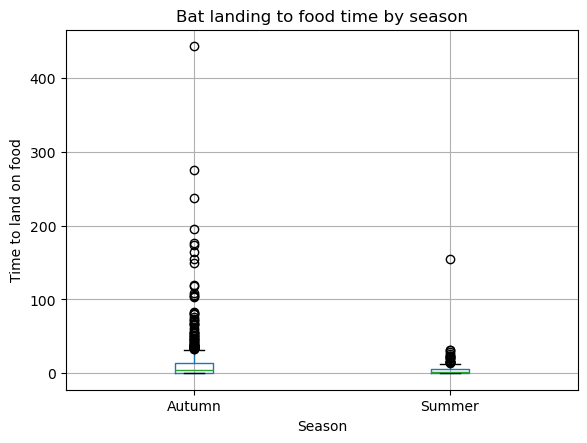

In [19]:
# bat_landing_to_food distribution by season
d1.boxplot(column='bat_landing_to_food', by='season')
plt.title("Bat landing to food time by season")
plt.suptitle("")  # remove automatic title
plt.xlabel("Season")
plt.ylabel("Time to land on food")
plt.show()

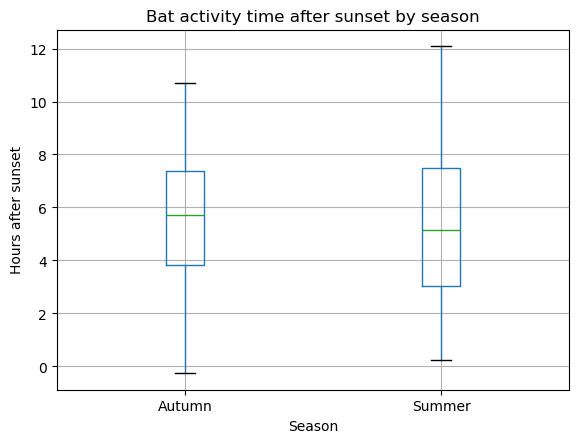

In [20]:
# hours_after_sunset distribution by season
d1.boxplot(column='hours_after_sunset', by='season')
plt.title("Bat activity time after sunset by season")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("Hours after sunset")
plt.show()

In [24]:
# Statistical Test (Summer vs Autumn)
#Mann-Whitney U test
print("Mann-Whitney U test for bat activity time (Summer vs Autumn)")


Mann-Whitney U test for bat activity time (Summer vs Autumn)


In [25]:
# Compare bat activity time after sunset in Summer vs Autumn

# summer values
summer = d1[d1['season'] == 'Summer']['hours_after_sunset'].dropna()

# autumn values
autumn = d1[d1['season'] == 'Autumn']['hours_after_sunset'].dropna()

# Mann-Whitney U test
from scipy import stats
stat, p = stats.mannwhitneyu(summer, autumn, alternative='two-sided')

print("Mann-Whitney U test (Summer vs Autumn)")
print("Statistic:", stat)
print("P-value:", p)

Mann-Whitney U test (Summer vs Autumn)
Statistic: 55443.5
P-value: 0.5954718708973181


Conclusion:
p-value = 0.59 which is greater than 0.05.There is no significant difference in bat activity time after sunset between Summer and Autumn. So, season does not strongly change the bat activity time.
